#  Credit Data - UnSup Models

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
data=pd.read_csv('credits.csv')
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [39]:
data['credit_history'].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"],
      dtype=object)

In [31]:
 #data.isnull().sum()

For handling Continuous values we do scaling.(replace with z_score:-3 to +3)

In [45]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data=pd.DataFrame(sc.fit_transform(data),columns=data.columns)
data.head()

C:\Users\maganti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\maganti\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',...,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,-1.214598,1.214598,-0.196014,0.196014,-0.654654,0.654654
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,1.527525,-1.527525
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,-0.259299,...,-0.416784,-0.149983,2.0,-1.304877,0.823318,-0.823318,-0.196014,0.196014,-0.654654,0.654654
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,-0.654654,0.654654
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,1.527525,-1.527525


For handling Categorical data - use getdummies()

In [51]:
data=pd.get_dummies(data)
data.head()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',...,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,-1.214598,1.214598,-0.196014,0.196014,-0.654654,0.654654
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,1.527525,-1.527525
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,-0.259299,...,-0.416784,-0.149983,2.0,-1.304877,0.823318,-0.823318,-0.196014,0.196014,-0.654654,0.654654
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,-0.654654,0.654654
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,-0.259299,...,-0.416784,-0.149983,-0.5,0.766356,0.823318,-0.823318,-0.196014,0.196014,1.527525,-1.527525


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


Base Model

In [55]:
cluster=KMeans(n_clusters=6,random_state=201)
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=201, tol=0.0001, verbose=0)

In [57]:
basepred=cluster.predict(data)

In [68]:
cluster_range = range( 2, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,60144.900065
1,3,58004.965823
2,4,55898.244284
3,5,54491.608574
4,6,53398.170529
5,7,52297.129016
6,8,51493.710894
7,9,50529.213909
8,10,49418.506989
9,11,49020.414617


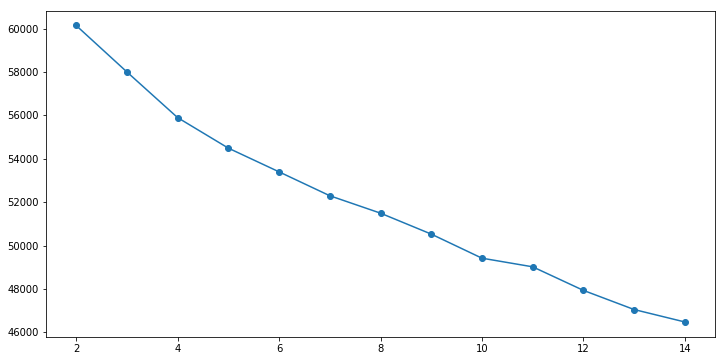

In [69]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Best k value - 10 i.e for K-Means clustering to this dataset inferred from the above elbow graph.